# Gradient Boosting

### The key idea is to optimize a loss function over the iterations

###### 1. Initialize the model with a constant value.
###### 2. Fit a weak learner (e.g., a decision tree) to the residuals (errors) of the previous model.
###### 3. Update the model by adding the fitted weak learner to minimize the loss.
###### 4. Repeat the process for a specified number of iterations or until convergence.

### Import necessary libraries

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
data = {
    'Age': [25, 45, 35, 50, 23, 37, 32, 28, 40, 27],
    'Income': [50000, 60000, 70000, 80000, 20000, 30000, 40000,
               55000, 65000, 75000],
    'Years_Experience': [1, 20, 10, 25, 2, 5, 7, 3, 15, 12],
    'Load_Approved': [0, 1, 1, 1, 0, 0, 1, 0, 1, 1]
}



In [11]:
df = pd.DataFrame(data)

### Independent variables (features) and dependent variable (target)

In [17]:
# Independent variables (features) and dependent variable (target)
X = df[['Age', 'Income', 'Years_Experience']]
y = df['Load_Approved']


### Splitting the data into training and testing sets

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 0)

### Creating and training the gradient boosting model

In [25]:
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,
                                  max_depth=3, random_state=0)
model.fit(X_train, Y_train)

GradientBoostingClassifier(random_state=0)

### Making Predictions

In [30]:
y_pred = model.predict(X_test)


### Evaluating the model

In [32]:
accuracy = accuracy_score(Y_test, y_pred)
conf_matrix = confusion_matrix(Y_test, y_pred)
class_report = classification_report(Y_test, y_pred)

In [34]:
print(f'Accuracy: {accuracy_score}')
print(f'Confusion_matrix: {conf_matrix}')
print(f'Classification_report: {class_report}')

Accuracy: <function accuracy_score at 0x000001F4DE456A20>
Confusion_matrix: [[2]]
Classification_report:               precision    recall  f1-score   support

           1       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



### Feature importance

In [38]:
feature_importances = pd.DataFrame(model.feature_importances_, index=X.columns,
                                   columns=['Importance']).sort_values('Importance',
                                                                       ascending=False)
print(f'Feature Importance:\n{feature_importances}')

Feature Importance:
                  Importance
Years_Experience         1.0
Age                      0.0
Income                   0.0


### Plotting the feature importances


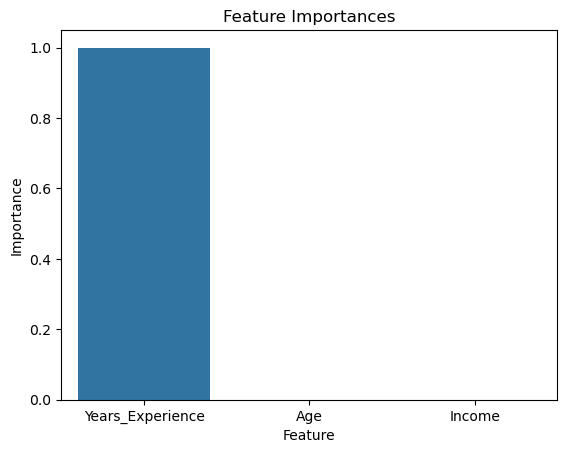

In [40]:
# Plotting the feature importances
sns.barplot(x=feature_importances.index, y=feature_importances['Importance'])
plt.title('Feature Importances')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()